In [0]:
import pandas as pd
import skimage.io as io
from PIL import Image 
import warnings
warnings.filterwarnings(action='ignore')


In [0]:
data_url = 'https://raw.githubusercontent.com/andandandand/ImageAnalysisWithAlgorithmicInformation/master/fourByFourCTMs.csv'
ctms_df = pd.read_csv(data_url, 
                      header=None, 
                      names=['block', 'ctm_value'],
                      dtype={'block': object})

ctms_dict = dict(zip(ctms_df['block'].values, ctms_df['ctm_value'].values))


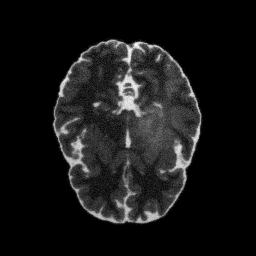

In [158]:
imag_array = io.imread('https://github.com/andandandand/ImageAnalysisWithAlgorithmicInformation/blob/master/images/t2BrainSlice.png?raw=true')
Image.fromarray(imag_array)

In [159]:
imag_array.shape[0]

256

In [160]:
mini_array = imag_array[128:128+8, 128:128+8]
mini_array

Array([[ 77,  46,  58,  58,  74,  54,  78,  69],
       [ 93,  53,  66,  71,  56,  56,  62,  64],
       [ 91,  67,  68,  55,  57,  67,  75,  62],
       [136,  71,  64,  64,  66,  63,  65,  80],
       [146,  82,  63,  61,  57,  79,  48,  61],
       [140, 102,  67,  57,  65,  52,  56,  43],
       [160, 103,  54,  50,  64,  70,  65,  50],
       [166,  81,  56,  56,  54,  63,  62,  49]], dtype=uint8)

In [0]:
from skimage.util.shape import view_as_windows

def layered_bdm(imag_array):
  raw_blocks       = view_as_windows(imag_array, (4, 4), step = 1)
  i, j, _, _       = raw_blocks.shape
  flattened_blocks = [raw_blocks[x][y].flatten() for x in range(i) for y in range(j)]

  binary_blocks = []
  for block in flattened_blocks:
    for thresh in range(255):
      bin_array = list((block == thresh).astype(np.uint8))    
      binary_blocks.append(''.join(map(str, bin_array)))

  unique_blocks, block_counts = np.unique(binary_blocks, return_counts=True)

  return(np.sum([ctms_dict[block] for block in unique_blocks]) + np.sum(np.log2(block_counts)))
  

In [162]:
layered_bdm(mini_array)

1817.8776670932257